In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

Getting data

In [2]:
train = pd.read_csv(r'C:\Programs\MyPrograms\Python\ML\3K2SML\IT\train.csv').dropna().sample(frac = 0.5)
test = pd.read_csv(r'C:\Programs\MyPrograms\Python\ML\3K2SML\IT\test.csv').dropna().sample(frac = 0.5)
print(train.shape)

(8425, 28)


In [3]:
independent_features = ['Hour', 'Weekend','Month']
dependent_feature = 'TotalTimeStopped_p50'

Correlation between features

<AxesSubplot:>

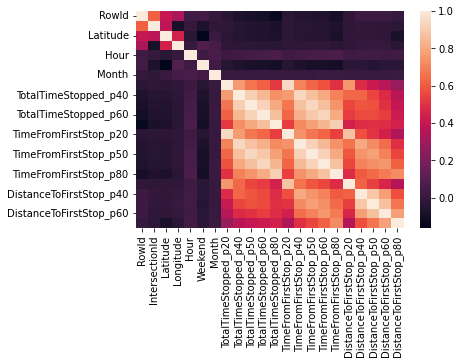

In [4]:
corr = train.corr()
sns.heatmap(corr)

Correlation between features and target variable

In [5]:
corr_with_target = train.corrwith(train[dependent_feature])
print(corr_with_target)

RowId                     -0.083726
IntersectionId            -0.050953
Latitude                  -0.055623
Longitude                 -0.027469
Hour                       0.049409
Weekend                   -0.083228
Month                      0.010839
TotalTimeStopped_p20       0.662260
TotalTimeStopped_p40       0.912402
TotalTimeStopped_p50       1.000000
TotalTimeStopped_p60       0.927311
TotalTimeStopped_p80       0.795862
TimeFromFirstStop_p20      0.669305
TimeFromFirstStop_p40      0.874389
TimeFromFirstStop_p50      0.938364
TimeFromFirstStop_p60      0.865777
TimeFromFirstStop_p80      0.745597
DistanceToFirstStop_p20    0.554254
DistanceToFirstStop_p40    0.588461
DistanceToFirstStop_p50    0.577605
DistanceToFirstStop_p60    0.497835
DistanceToFirstStop_p80    0.396176
dtype: float64


Scatter plots: feature vs. feature, feature vs. target


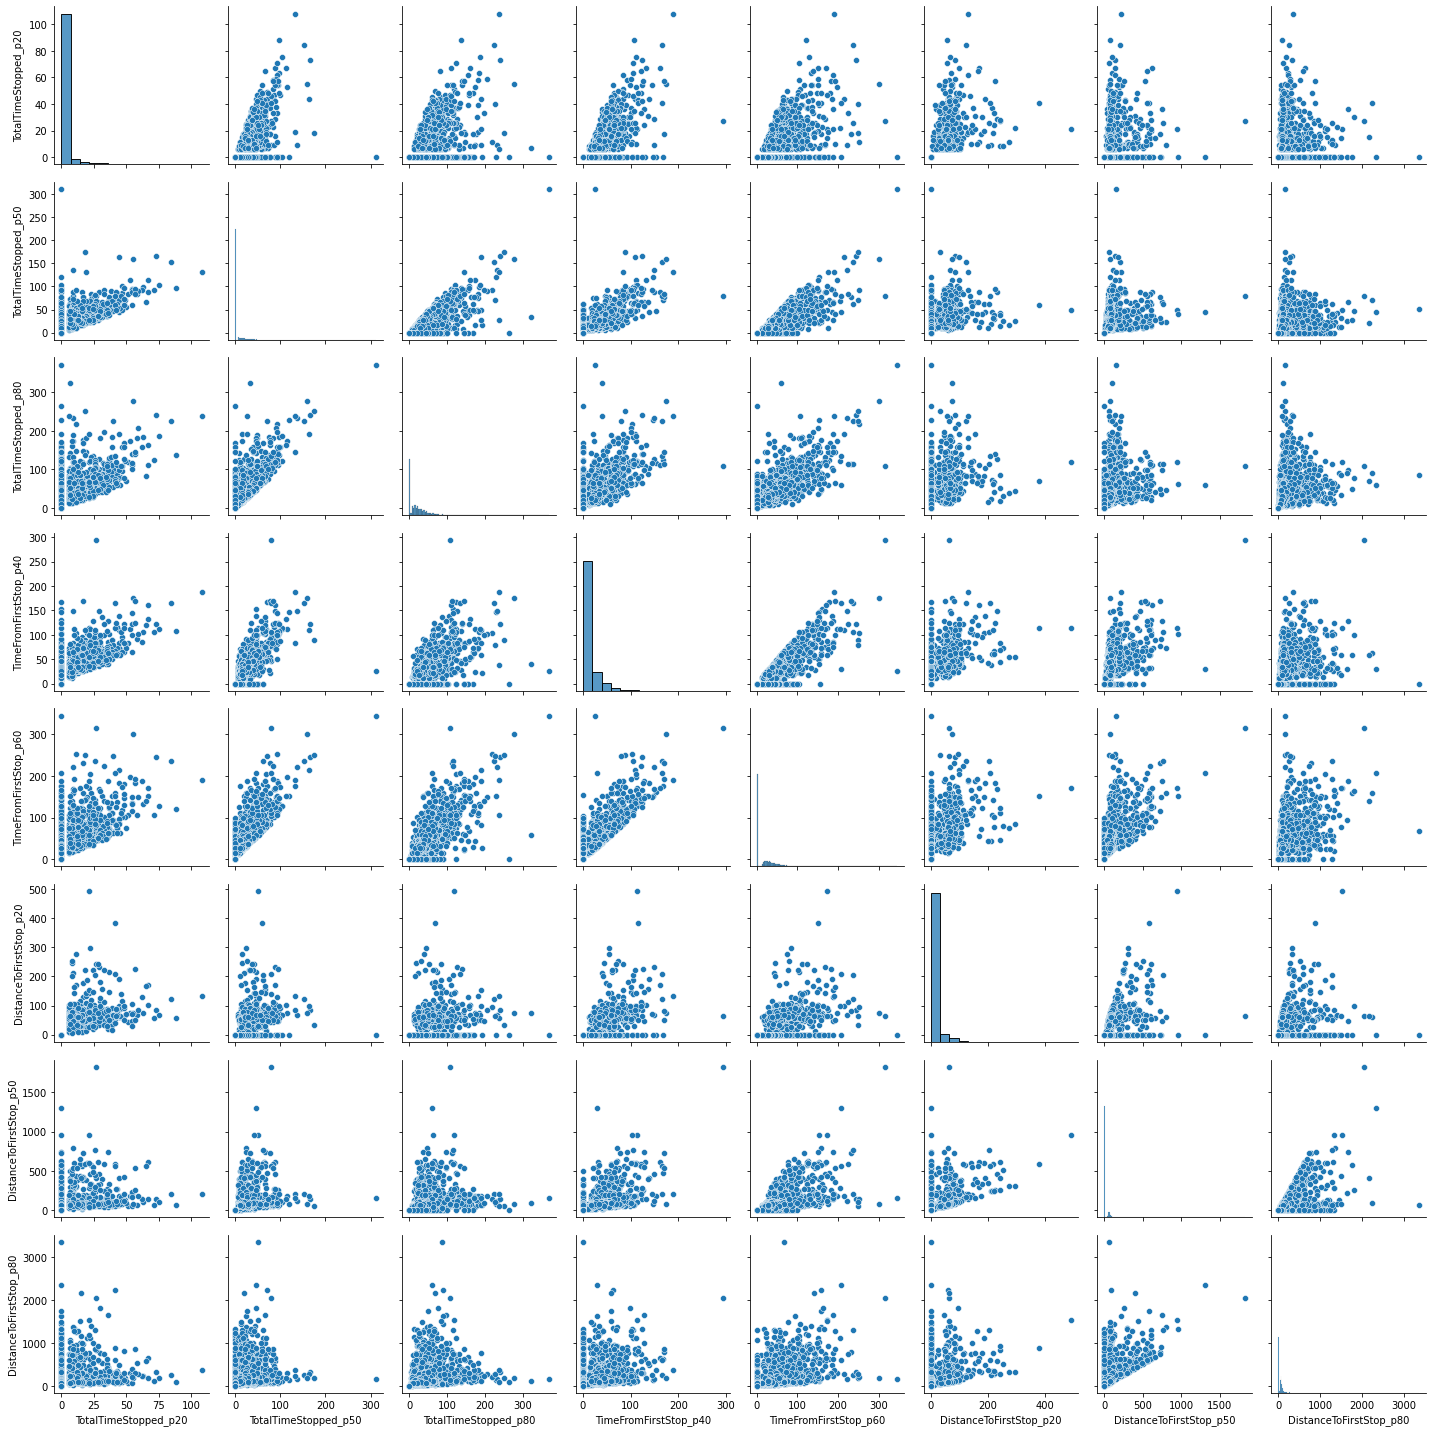

In [6]:
features = list(train)[12::2]
sns.pairplot(train[features])
plt.tight_layout()
plt.show()

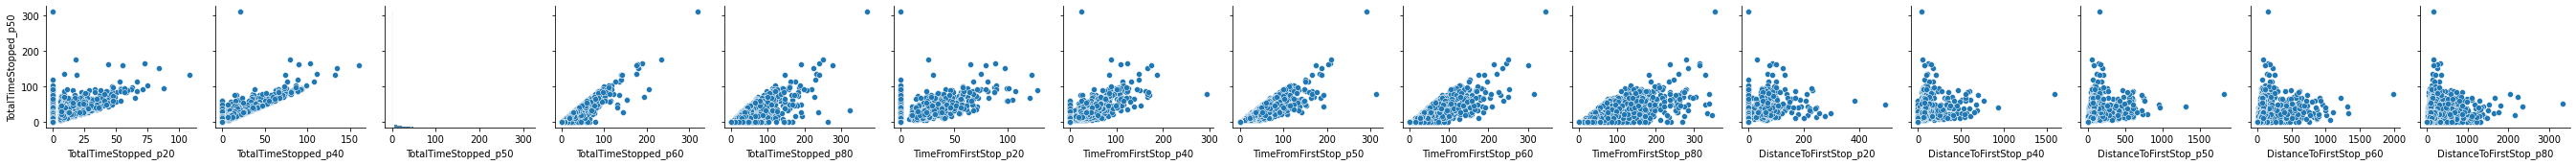

In [7]:
features = list(train)[12:]
target = 'TotalTimeStopped_p50'
sns.pairplot(train[features], y_vars=dependent_feature)
plt.tight_layout()
plt.show()

Bar charts for features

<AxesSubplot:xlabel='Month', ylabel='TotalTimeStopped_p50'>

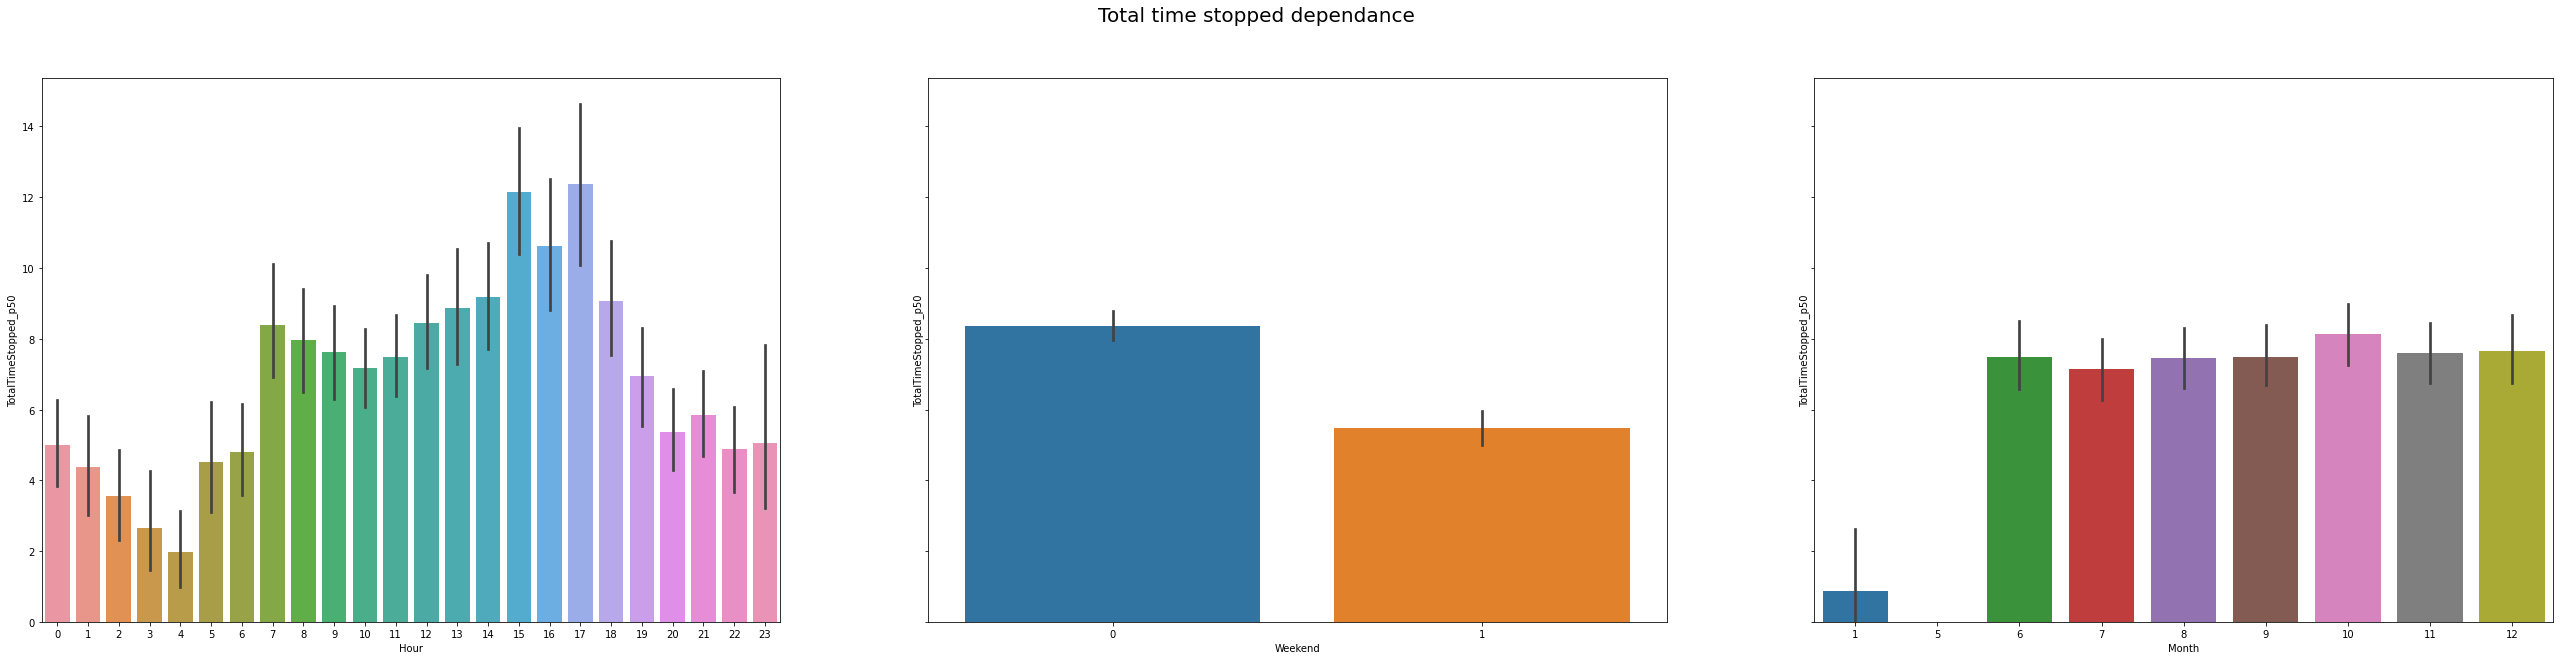

In [8]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(45,10))
fig.suptitle('Total time stopped dependance', fontsize='20')

sns.barplot(data=train, x='Hour', y='TotalTimeStopped_p50', ax=axes[0])
sns.barplot(data=train, x='Weekend', y='TotalTimeStopped_p50', ax=axes[1])
sns.barplot(data=train, x='Month', y='TotalTimeStopped_p50', ax=axes[2])

Custom linear regressor

In [9]:
def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_new = (X - mean)/std
    return X_new, mean, std

In [10]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [11]:
def hypothesis(X, theta):
    h_theta = np.sum(X*theta, axis=1)
    return h_theta

In [12]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = 1/(2*m)*sum((hypothesis(X, theta) - y)**2)
    return J

In [13]:
def derivative(X, y, theta):
    m = X.shape[0]
    fac = hypothesis(X, theta) - y
    fac_sqr = fac**2
    under_sum = X*fac_sqr[:,np.newaxis]
    d_theta = 1/m*np.sum(under_sum, axis=0)
    #d_theta = 1/m*np.sum(X*((hypothesis(X, theta) - y)**2)[:,np.newaxis], axis=0)
    return d_theta

In [14]:
def gradient_descent(X, y, theta, alpha, max_iter):
    J_history = [cost_function(X, y, theta)]
    for i in range(max_iter):
        #print(i)
        delta = derivative(X, y, theta)
        theta = theta + alpha * delta
        J_history.append(cost_function(X, y, theta))

        if any(np.isnan(theta)):
            break
        if any(np.isnan(delta)):
            break
        
    return theta, J_history

In [15]:
X_train, y_train = train[independent_features].to_numpy(), train[dependent_feature].to_numpy()
X_test, y_test = test[independent_features].to_numpy(), test[dependent_feature].to_numpy()

In [16]:
X_train_normalized, mean, std = normalize(X_train) 

In [17]:
X_train = prepare_X(X_train_normalized)

In [18]:
theta = np.array([1 for _ in range(X_train.shape[1])])

In [19]:
alpha = 10**-5
max_iter = 1800

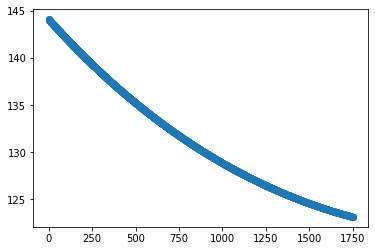

In [20]:
new_theta, Js = gradient_descent(X_train, y_train, theta, alpha, max_iter)
plt.scatter(range(len(Js)-50),Js[:-50])

In [21]:
print(new_theta)

[ 5.72100727  1.79046428 -0.22067943  1.23968699]


In [22]:
def NormalEquation(X, y):
    return np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), y))

In [23]:
NormalEquation(X_train, y_train)

array([ 7.56403561,  0.79525442, -1.32258465,  0.17403502])

Sklearn LinearRegression

In [24]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(np.concatenate(([reg.intercept_], reg.coef_[1:])))
print(cost_function(X_train, y_train, reg.coef_))

[ 7.56403561  0.79525442 -1.32258465  0.17403502]
148.00972288400146


Grid/Random Search

In [25]:
...

Ellipsis

Results Evaluation

In [26]:
def MAE(y_, y):
    return 1/len(y) * sum(abs(y_ - y))

In [27]:
def MSE(y_, y):
    return 1/len(y) * sum(y_ - y)**2

In [28]:
def RMSE(y_, y):
   return np.sqrt(MSE(y_, y))

In [29]:
print(f'{MAE(hypothesis(X_train, new_theta), y_train)} vs {MAE(hypothesis(X_train, np.concatenate(([reg.intercept_], reg.coef_[1:]))), y_train)}')

9.627015997004372 vs 10.331612556224913


In [30]:
print(f'{MSE(hypothesis(X_train, new_theta), y_train)} vs {MSE(hypothesis(X_train, np.concatenate(([reg.intercept_], reg.coef_[1:]))), y_train)}')

28617.647888888532 vs 2.784562187836194e-26


In [31]:
print(f'{RMSE(hypothesis(X_train, new_theta), y_train)} vs {RMSE(hypothesis(X_train, np.concatenate(([reg.intercept_], reg.coef_[1:]))), y_train)}')

169.16751428358972 vs 1.6687007484375962e-13
